### Step 1: Installing packages

In [ ]:
# ! pip install impedance

### Step 2: Import your data

This example will assume the following dataset is located in your current working directory (feel free to replace it with your data): exampleData.csv

For this dataset which simply contains impedance data in three columns (frequency, Z_real, Z_imag), importing the data looks something like:

In [1]:
from impedance import preprocessing

# Load data from the example EIS data
frequencies, Z = preprocessing.readCSV('/home/impedance.py/data/exampleData.csv')

# keep only the impedance data in the first quandrant
frequencies, Z = preprocessing.ignoreBelowX(frequencies, Z)

### Step 3: Define your impedance 

Next we want to define our impedance model. In order to enable a wide variety of researchers to use the tool, impedance.py allows you to define a custom circuit with any combination of circuit elements.

The circuit is defined as a string (i.e. using '' in Python), where elements in series are separated by a dash (-), and elements in parallel are wrapped in a p( , ). Each element is defined by the function (in circuit-elements.py) followed by a single digit identifier.

For example, the circuit below:



would be defined as R0-p(R1,C1)-p(R2-Wo1,C2).

Each circuit, we want to fit also needs to have an initial guess for each of the parameters. These inital guesses are passed in as a list in order the parameters are defined in the circuit string. For example, a good guess for this battery data is initial_guess = [.01, .01, 100, .01, .05, 100, 1].

We create the circuit by importing the CustomCircuit object and passing it our circuit string and initial guesses.

In [2]:
from impedance.models.circuits import CustomCircuit

circuit = 'R0-p(R1,C1)-p(R2-Wo1,C2)'
initial_guess = [.01, .01, 100, .01, .05, 100, 1]

circuit = CustomCircuit(circuit, initial_guess=initial_guess)

### Step 4: Fit the impedance model to data

Once we've defined our circuit, fitting it to impedance data is as easy as calling the .fit() method and passing it our experimental data!

In [3]:
circuit.fit(frequencies, Z)

In [4]:
print(circuit)


Circuit string: R0-p(R1,C1)-p(R2-Wo1,C2)
Fit: True

Initial guesses:
     R0 = 1.00e-02 [Ohm]
     R1 = 1.00e-02 [Ohm]
     C1 = 1.00e+02 [F]
     R2 = 1.00e-02 [Ohm]
  Wo1_0 = 5.00e-02 [Ohm]
  Wo1_1 = 1.00e+02 [sec]
     C2 = 1.00e+00 [F]

Fit parameters:
     R0 = 1.65e-02  (+/- 1.54e-04) [Ohm]
     R1 = 8.68e-03  (+/- 1.91e-04) [Ohm]
     C1 = 3.32e+00  (+/- 1.90e-01) [F]
     R2 = 5.39e-03  (+/- 2.06e-04) [Ohm]
  Wo1_0 = 6.31e-02  (+/- 1.94e-03) [Ohm]
  Wo1_1 = 2.33e+02  (+/- 1.62e+01) [sec]
     C2 = 2.20e-01  (+/- 1.75e-02) [F]



### Step 5: Analyze/Visualize the results

For this dataset, the resulting fit parameters are

| Parameter     | Value    |
|---------------|----------|
| $R_0$       | 1.65e-02 |
| $R_1$       | 8.68e-03 |
| $C_1$       | 3.32e+00 |
| $R_2$       | 5.39e-03 |
| $Wo_{1,0}$  | 6.31e-02 |
| $Wo_{1,1}$  | 2.33e+02 |
| $C_2$       | 2.20e-01 |

We can get the resulting fit impedance by passing a list of frequencies to the .predict() method.

In [5]:
Z_fit = circuit.predict(frequencies)

To easily visualize the fit, the plot_nyquist() function can be handy.

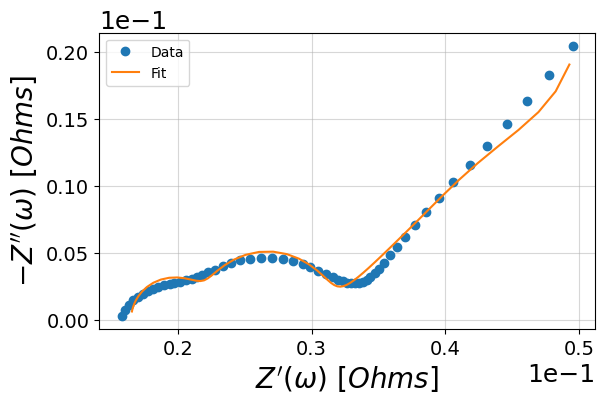

In [6]:
import matplotlib.pyplot as plt
from impedance.visualization import plot_nyquist

fig, ax = plt.subplots()
plot_nyquist(Z, fmt='o', scale=10, ax=ax)
plot_nyquist(Z_fit, fmt='-', scale=10, ax=ax)

plt.legend(['Data', 'Fit'])
plt.show()

我们刚刚导入的类代表不同的等效电路模型。要实际使用它们，我们需要初始化一个特定的实例，并为参数和任何其他选项提供初始猜测。

例如，对于 randles 电路，其中一个选项是使用恒相元件 (CPE) 而不是理想电容器。

定义自定义电路的工作方式略有不同。在这里，我们传递一个由电路元件组成的字符串，这些电路元件要么串联（用 - 分隔），要么并联（使用形式 p(X,Y)）。每个元素都可以附加一个整数（例如 R0）或一个下划线和一个整数（例如 CPE_1），以便更容易跟踪同一类型的多个元素。

从 0.4 版开始，您现在可以指定要保持不变的值。例如，

我们创建的每个电路对象都可以打印出来，以便查看已为该电路定义的属性。

制定数据
impedance.preprocessing 模块中存在几个用于导入数据的便捷函数，包括一个用于读取简单 .csv 文件的函数，其中频率存储在第一列，阻抗的实部存储在第二列，阻抗的虚部存储在第三列。

3. 将等效电路拟合到频谱
每个电路类都有一个 .fit() 方法，用于查找最佳拟合参数。

拟合电路后，打印时会显示拟合参数，而不是初始猜测。

4a. 预测电路模型并使用 matplotlib 进行可视化

4b. 或者使用包中包含的便捷绘图方法

使用 @element 装饰器自定义电路元素

一旦我们定义了自定义元素，就可以在 CustomCircuit 中使用它

循环并拟合多个阻抗数据集